In [448]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [449]:
df = pd.read_csv("../python/csv_files/homeprices_onehot.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robbinsville,2600,575000


<AxesSubplot: xlabel='area', ylabel='price'>

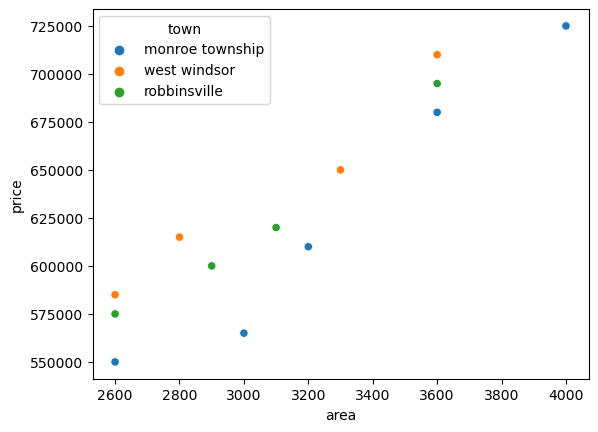

In [450]:
sns.scatterplot(x=df['area'], y=df['price'], hue=df['town'])

In [451]:
dummies = pd.get_dummies(df['town'])
dummies

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [452]:
merged = pd.concat([df, dummies], axis='columns')
merged

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robbinsville,2600,575000,0,1,0


In [453]:
final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,price,monroe township,robbinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [454]:
X = final.drop('price', axis='columns')
y = final['price']

In [455]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [456]:
print(model.coef_)
print(model.intercept_)

[   126.89744141 -40013.97548914 -14327.56396474]
249790.36766292527


In [457]:
def plot_prediction(df, area, monroe, robbinsvile):
    prediction = model.predict([[area, monroe, robbinsvile]])
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.scatter(area, prediction, color='magenta', marker='*', label=f'Prediction: ${prediction[0]:,.2f}')
    sns.scatterplot(x=df['area'], y=df['price'], hue=df['town'])    
    plt.scatter(area, prediction, color='magenta', marker='*')

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


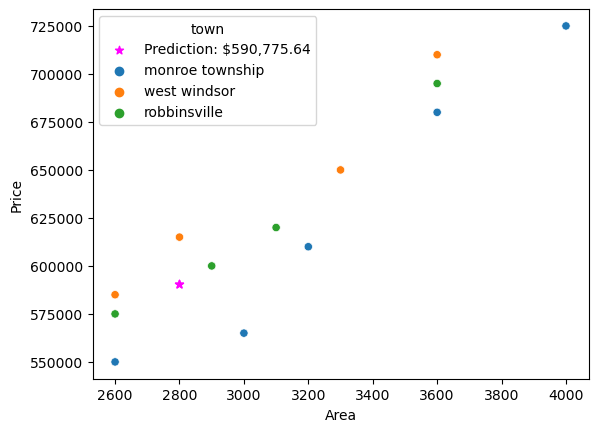

In [458]:
# Predicting the price for a house with area 2800, in the town of 'robbinsville'
plot_prediction(df, 2800, 0, 1)

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


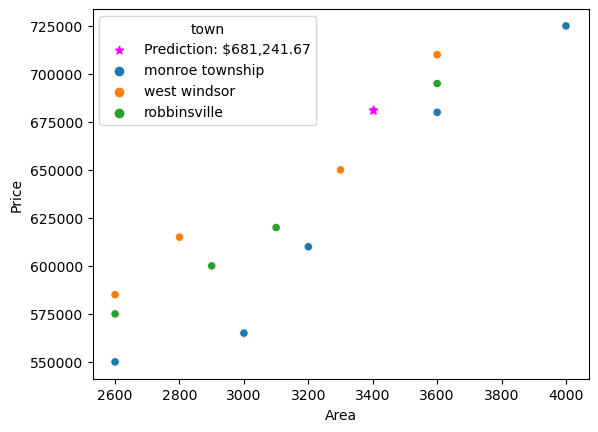

In [459]:
# Predicting the price for a house with area 3400, in the town of 'west windsor'
plot_prediction(df, 3400, 0, 0)

In [460]:
model.score(X, y)

0.9573929037221872

In [461]:
le = LabelEncoder()

dfle = df.copy()
dfle.town = le.fit_transform(dfle.town)

dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [462]:
X = dfle[['area', 'town']].values
y = dfle['price'].values

ct = ColumnTransformer([('town', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X)
X = X[:,1:]
X = np.hstack((X[:, -1:], X[:, :-1]))  # Move 'area' to the first column
X

array([[2.6e+03, 0.0e+00, 0.0e+00],
       [3.0e+03, 0.0e+00, 0.0e+00],
       [3.2e+03, 0.0e+00, 0.0e+00],
       [3.6e+03, 0.0e+00, 0.0e+00],
       [4.0e+03, 0.0e+00, 0.0e+00],
       [2.6e+03, 0.0e+00, 1.0e+00],
       [2.8e+03, 0.0e+00, 1.0e+00],
       [3.3e+03, 0.0e+00, 1.0e+00],
       [3.6e+03, 0.0e+00, 1.0e+00],
       [2.6e+03, 1.0e+00, 0.0e+00],
       [2.9e+03, 1.0e+00, 0.0e+00],
       [3.1e+03, 1.0e+00, 0.0e+00],
       [3.6e+03, 1.0e+00, 0.0e+00]])

In [463]:
model.fit(X, y)

LinearRegression()

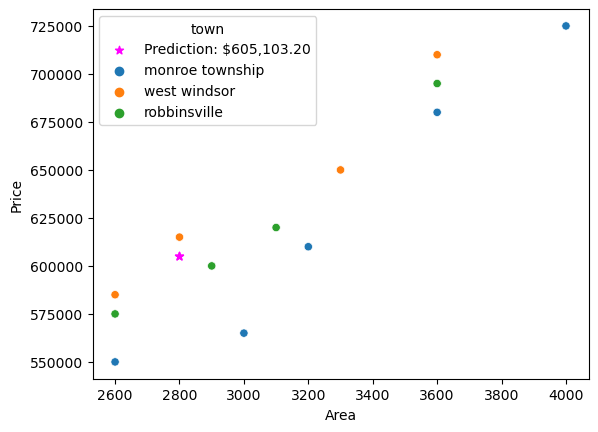

In [464]:
# Predicting the price for a house with area 2800, in the town of 'robbinsville'
plot_prediction(df, 2800, 0, 1)

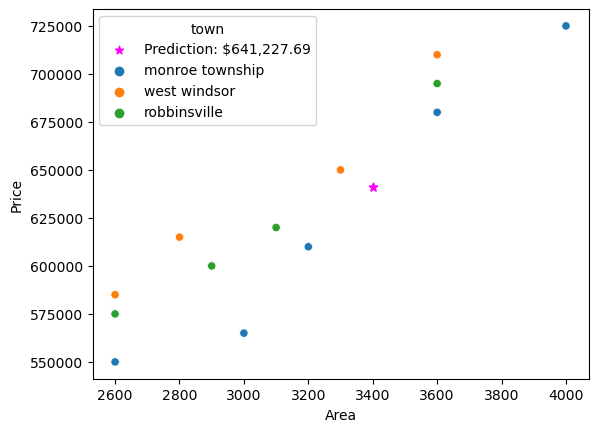

In [465]:
# Predicting the price for a house with area 3400, in the town of 'west windsor'
plot_prediction(df, 3400, 0, 0)

# Exercise
### 1) Predict price of a 4 y/o Mercedes Benz with 45000 miles [37000]
### 2) Predict price of a 7 y/o BMW X5 with 86000 miles [11000]

In [466]:
data = pd.read_csv("../python/csv_files/carprices.csv")
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


<AxesSubplot: xlabel='Age(yrs)', ylabel='Sell Price($)'>

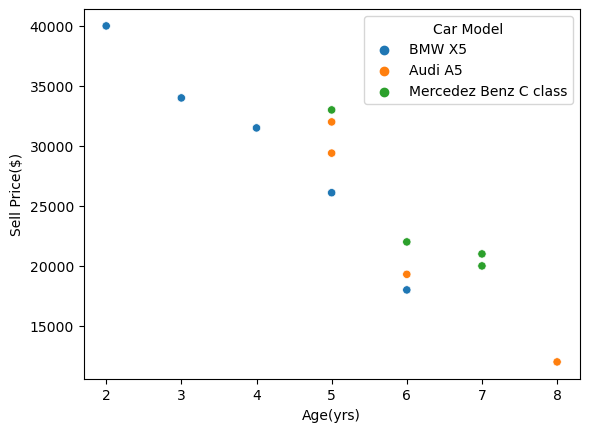

In [467]:
sns.scatterplot(x=data['Age(yrs)'], y=data['Sell Price($)'], hue=data['Car Model'])

In [468]:
dummies = pd.get_dummies(data['Car Model']).drop('Mercedez Benz C class', axis='columns')
dummies

,Audi A5,BMW X5
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,0,0


In [469]:
final = pd.concat([data, dummies], axis='columns').drop(['Car Model'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [470]:
X = final.drop('Sell Price($)', axis='columns')
y = final['Sell Price($)']
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [471]:

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
def plot_prediction(df, miles, age, audi, bmw):
    prediction = model.predict([[miles, age, audi, bmw]])
    plt.xlabel('Age')
    plt.ylabel('Price')
    plt.scatter(age, prediction, color='magenta', marker='*', label=f'Prediction: ${prediction[0]:,.2f}')
    sns.scatterplot(x=df['Age(yrs)'], y=df['Sell Price($)'], hue=df['Car Model'])    
    plt.scatter(age, prediction, color='magenta', marker='*')

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


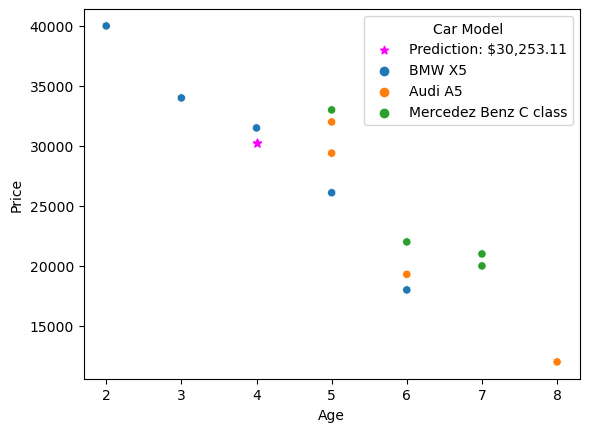

In [473]:
plot_prediction(data, 45000, 4, 0, 1)

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


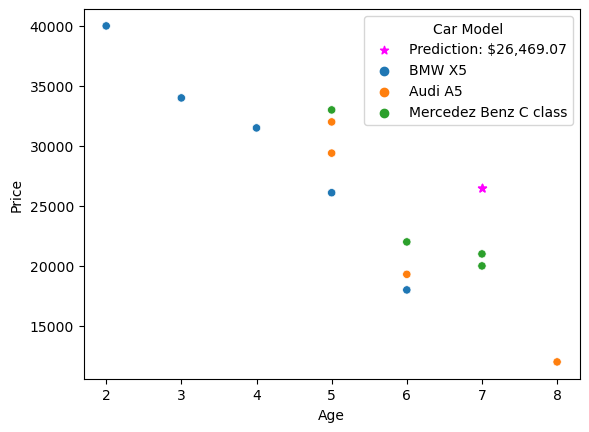

In [474]:
plot_prediction(data, 56000, 7, 1, 0)

In [475]:
model.score(X,y)

0.9417050937281082